**Classification** problems are a broad category of machine learning problems that involve the prediction of values taken from a discrete, finite number of cases. 

In this example, we'll build a classifier to predict to which species a flower belongs to.

## Reading data

In [1]:
import pandas as pd

iris = pd.read_csv('../datasets/iris.csv')

In [2]:
# Print some info and statistics about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_length    150 non-null float64
Sepal_width     150 non-null float64
Petal_length    150 non-null float64
Petal_width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [3]:
iris.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Encode the classes to numeric values
class_encodings = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

iris.Class = iris.Class.map(class_encodings)

In [6]:
iris.Class.unique()

array([0, 1, 2])

## Visualizing data

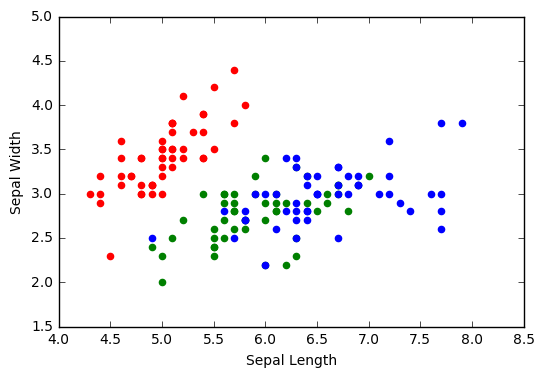

In [7]:
# Create a scatterplot for sepal length and sepal width
import matplotlib.pyplot as plt
%matplotlib inline

sl = iris.Sepal_length
sw = iris.Sepal_width

# Create a scatterplot of these two properties using plt.scatter()
# Assign different colors to each data point according to the class it belongs to
plt.scatter(sl[iris.Class == 0], sw[iris.Class == 0], color='red')
plt.scatter(sl[iris.Class == 1], sw[iris.Class == 1], color='green')
plt.scatter(sl[iris.Class == 2], sw[iris.Class == 2], color='blue')
# Specify labels for the X and Y axis
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
# Show graph
plt.show()

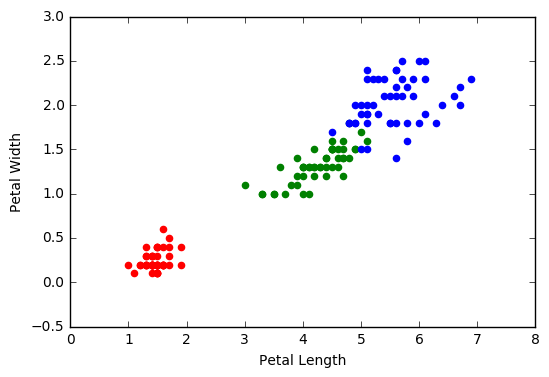

In [8]:
# Create a scatterplot for petal length and petal width
pl = iris.Petal_length
pw = iris.Petal_width

# Create a scatterplot of these two properties using plt.scatter()
# Assign different colors to each data point according to the class it belongs to
plt.scatter(pl[iris.Class == 0], pw[iris.Class == 0], color='red')
plt.scatter(pl[iris.Class == 1], pw[iris.Class == 1], color='green')
plt.scatter(pl[iris.Class == 2], pw[iris.Class == 2], color='blue')
# Specify labels for the X and Y axis
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Show graph
plt.show()

## Classifying species

We'll use [scikit-learn's LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to build out classifier.

In [9]:
X = iris.drop('Class', axis=1)
t = iris.Class.values

# Use sklean's train_test_plit() method to split our data into two sets.
from sklearn.cross_validation import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X, t)

/Users/fmmartin/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Use the training set to build a LogisticRegression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(Xtr, ytr) # Fit a logistic regression model

In [11]:
# Use the LogisticRegression's score() method to assess the model accuracy
lr.score(Xtr, ytr)

0.9732142857142857

In [12]:
from sklearn.metrics import confusion_matrix

# Use scikit-learn's confusion_matrix to understand which classes were misclassified.
# See http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(ytr, lr.predict(Xtr))

array([[38,  0,  0],
       [ 0, 34,  3],
       [ 0,  0, 37]])